In [1]:
import pandas as pd
import numpy as np
import math
from collections import OrderedDict

datapath = '../data/whfastias15comparison/'
ias15 = pd.read_csv(datapath+'ias15.csv', index_col=0)
dts = [1,2,5,15]
#dts = [1,2,3,5,7,15]
datasets = ['ias15shadow'] + ["whfastdt{:.3f}".format(dt*math.sqrt(3)/100.) for dt in dts]
#datasets = ['ias15shadow', 'whfastdt0.087safemode'] + ["whfastdt{:.3f}".format(dt*math.sqrt(3)/100.) for dt in dts]
frames = [pd.read_csv(datapath+dataset+'.csv', index_col=0) for dataset in datasets]
dfs = OrderedDict(zip(datasets, frames))

In [46]:
tbins = np.logspace(-3,0,30)
tbins = np.concatenate([-np.flip(tbins,0), tbins]) # log bins from -10^-3...-1, +1...+10^6
tbins

array([-1.        , -0.78804628, -0.62101694, -0.48939009, -0.38566204,
       -0.30391954, -0.23950266, -0.18873918, -0.14873521, -0.11721023,
       -0.09236709, -0.07278954, -0.05736153, -0.04520354, -0.03562248,
       -0.02807216, -0.02212216, -0.01743329, -0.01373824, -0.01082637,
       -0.00853168, -0.00672336, -0.00529832, -0.00417532, -0.00329034,
       -0.00259294, -0.00204336, -0.00161026, -0.00126896, -0.001     ,
        0.001     ,  0.00126896,  0.00161026,  0.00204336,  0.00259294,
        0.00329034,  0.00417532,  0.00529832,  0.00672336,  0.00853168,
        0.01082637,  0.01373824,  0.01743329,  0.02212216,  0.02807216,
        0.03562248,  0.04520354,  0.05736153,  0.07278954,  0.09236709,
        0.11721023,  0.14873521,  0.18873918,  0.23950266,  0.30391954,
        0.38566204,  0.48939009,  0.62101694,  0.78804628,  1.        ])

In [43]:
tbins = np.logspace(0,6,30)
tbins = np.concatenate([-np.flip(tbins,0), tbins]) # log bins from -10^-6...-1, +1...+10^6
filt = df.instability_time != df_ref.instability_time
sign = (df.instability_time[filt]-df_ref.instability_time[filt])/np.abs(df.instability_time[filt]-df_ref.instability_time[filt])
logdeltaT = np.log10(np.abs(df[filt].instability_time - df_ref[filt].instability_time)/df_ref[filt].instability_time)
signedlogdeltaT = sign*logdeltaT

1     0.165967
2     0.019027
4     0.732703
6     0.198109
7     0.207721
8    -0.415404
9     1.840677
12    0.582218
15    0.230891
20    0.212856
Name: instability_time, dtype: float64


In [37]:
print(df.instability_time[0:5])
print(df_ref.instability_time[0:5])
print(df.instability_time[0:5]-df_ref.instability_time[0:5])
print(np.abs(df.instability_time[0:5]-df_ref.instability_time[0:5]))
print(df.instability_time[0:5]*(df.instability_time[0:5]-df_ref.instability_time[0:5])/np.abs(df.instability_time[0:5]-df_ref.instability_time[0:5]))

0    1000000.000000
1     317610.065497
2      14150.783221
3    1000000.000000
4       1824.351329
Name: instability_time, dtype: float64
0    1000000.000000
1    1000000.000000
2     330120.005872
3    1000000.000000
4        284.883862
Name: instability_time, dtype: float64
0         0.000000
1   -682389.934503
2   -315969.222651
3         0.000000
4      1539.467467
Name: instability_time, dtype: float64
0         0.000000
1    682389.934503
2    315969.222651
3         0.000000
4      1539.467467
Name: instability_time, dtype: float64
0              NaN
1   -317610.065497
2    -14150.783221
3              NaN
4      1824.351329
Name: instability_time, dtype: float64


ias15shadow
-----
Took 542.1564884279171 hours compared to 345.7798289334112 for reference IAS15 simulation (0.64x faster)
767 unstable outcomes vs 777 in reference IAS15 simulations
721 initial conditions where both were unstable
Median: 4.22 vs 4.251 (IAS15). Rel error = 7.427e-03
Mean: 4.2 vs 4.196 (IAS15). Rel error = 9.490e-04
Standard Deviation: 1.011 vs 1.002 (IAS15). Rel error = 9.735e-03
Probability of being drawn from the same distribution = 0.9442786033382539
Number of longer instability times: 355 Number shorter: 366 Asymmetry: -0.015256588072122053
*****
*****
whfastdt0.017
-----
Took 29.818877585596507 hours compared to 345.7798289334112 for reference IAS15 simulation (11.60x faster)
769 unstable outcomes vs 776 in reference IAS15 simulations
722 initial conditions where both were unstable
Median: 4.302 vs 4.26 (IAS15). Rel error = 9.734e-03
Mean: 4.263 vs 4.204 (IAS15). Rel error = 1.389e-02
Standard Deviation: 0.9966 vs 1.003 (IAS15). Rel error = 6.057e-03
Probability o

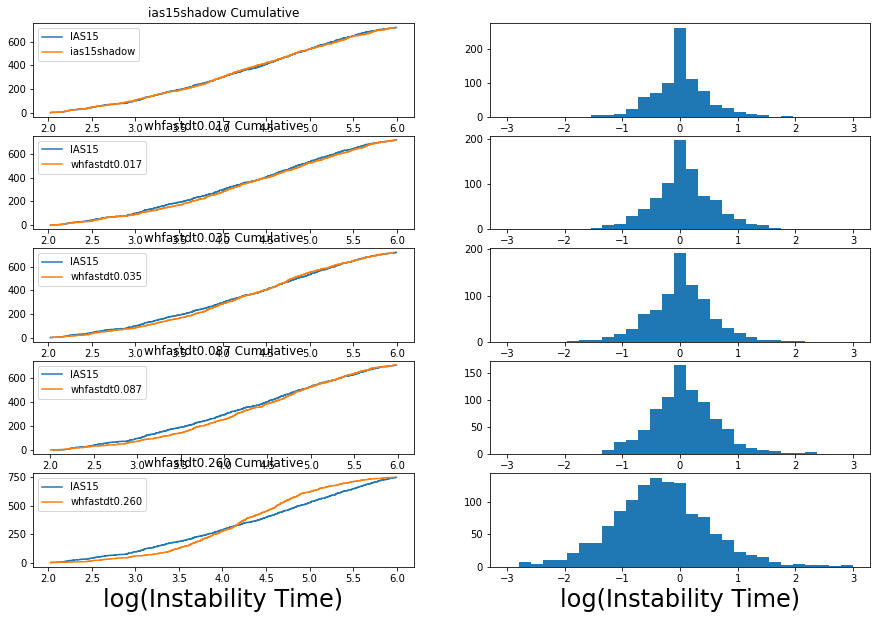

In [2]:
from scipy.stats.mstats import ks_2samp
%matplotlib inline
import matplotlib.pyplot as plt

Eerrs = []
ts = []
probsames = []
asymmetries = []
medianerrs = []
meanerrs = []
stdeverrs = []

Nbins = 30
bins = np.linspace(2,6,Nbins)
fig, axarr = plt.subplots(nrows=len(datasets), ncols=2, figsize=(15,10)) # set sharex = True if removing deltaT vs Eerr

for i, key in enumerate(datasets):
    df_ref = ias15
    df = dfs[key]
    print(key)
    print('-----')
    
    ref_time = df_ref.wall_time.sum()/3600 
    df_time = df.wall_time.sum()/3600 # hours
    print('Took {0} hours compared to {1} for reference IAS15 simulation ({2:.2f}x faster)'.format(df_time, ref_time, ref_time/df_time))
    
    mincutoff = 1e2
    filt = (df_ref.instability_time > mincutoff) & (df.instability_time > mincutoff)
    df_ref = df_ref[filt]
    df = df[filt]
    
    tbins = np.linspace(-3,3,30)
    filt = df.instability_time != df_ref.instability_time
    axarr[i,1].hist(np.log10(df[filt].instability_time) - np.log10(df_ref[filt].instability_time), bins = tbins)
    axarr[i,1].set_xlabel('Delta Log T')
    
    m1 = df_ref.instability_time < 1e6
    m2 = df.instability_time < 1e6
    print('{0} unstable outcomes vs {1} in reference IAS15 simulations'.format(m2.sum(), m1.sum()))
    m3 = m1 & m2
    print('{0} initial conditions where both were unstable'.format(m3.sum()))
    Ee2 = df.loc[m3, 'frac_energy_error']
    Eerrs.append(np.log10(Ee2.loc[Ee2 != 0]))
    df_ref_t = np.log10(df_ref.loc[m3, 'instability_time'])
    df_t = np.log10(df.loc[m3, 'instability_time'])
    ts.append(df_t)
    d,p = ks_2samp(df_ref_t, df_t)
    medianerrs.append(abs(df_t.median()-df_ref_t.median())/df_ref_t.median())
    meanerrs.append(abs(df_t.mean()-df_ref_t.mean())/df_ref_t.mean())
    stdeverrs.append(abs(df_t.std()-df_ref_t.std())/df_ref_t.std())
    probsames.append(p)
    print('Median: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.median(), df_ref_t.median(), medianerrs[-1]))
    print('Mean: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.mean(), df_ref_t.mean(), meanerrs[-1]))
    print('Standard Deviation: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.std(), df_ref_t.std(), stdeverrs[-1]))
    print('Probability of being drawn from the same distribution = {0}'.format(p))

    gt = []
    for j in range(df.shape[0]):
        if df.iloc[j].instability_time < 1e6 and df_ref.iloc[j].instability_time < 1e6:
            if df.iloc[j].instability_time >= df_ref.iloc[j].instability_time:
                gt.append(1)
            else:
                gt.append(0)

    Ngreater = np.asarray(gt).sum()
    Nless = len(gt)-Ngreater
    asymmetry = (Ngreater-Nless)/float(Ngreater+Nless)
    asymmetries.append(asymmetry)

    print("Number of longer instability times: {0} Number shorter: {1} Asymmetry: {2}".format(Ngreater, Nless, asymmetry))
    axarr[i,0].set_title(key + ' Cumulative')
    axarr[i,0].step(np.sort(df_ref_t), np.arange(df_ref_t.shape[0]), label='IAS15')
    axarr[i,0].step(np.sort(df_t), np.arange(df_t.shape[0]), label=key)
    axarr[i,0].legend(loc='upper left')
    
    print('*****')
    print('*****')
axarr[-1,0].set_xlabel('log(Instability Time)', fontsize=24)
axarr[-1,1].set_xlabel('log(Instability Time)', fontsize=24)

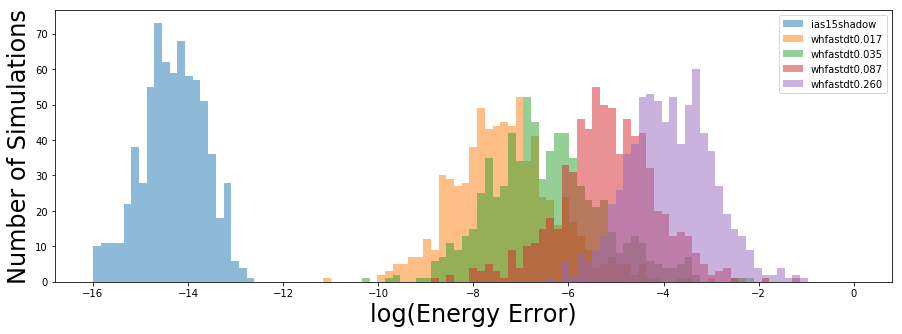

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Nbins = 100
bins = np.linspace(-16,0,Nbins)

fig, ax = plt.subplots(figsize=(15,5))
for i,key in enumerate(dfs):
    ax.hist(Eerrs[i], bins, alpha=0.5, label=key)
ax.set_xlabel('log(Energy Error)', fontsize=24)
ax.set_ylabel('Number of Simulations', fontsize=24)
plt.legend()